<a id='arrays'></a>
## Import Necessary Libraries
This cell imports essential libraries for building neural networks and data handling.


In [12]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   --------------------------------- ------ 1.3/1.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


torch: Core library for PyTorch, used for tensor operations and defining models.

torch.nn: Module that provides tools for building neural networks.

matplotlib.pyplot and numpy: Used for data visualization and numerical operations.

In [92]:
# Cell 1: Import necessary libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

<a id='arrays'></a>
## Define the Neuron Class
This cell defines a simple neuron class with three inputs and a single output, including weights and a bias.

The class `SimpleNeuron` inherits from `torch.nn.Module`, making it a neural network module.

`nn.Parameter` marks the weights and bias as trainable parameters.

The `forward` method defines how the input data flows through the neuron.

In [93]:
#Define the Neuron class
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        # Initialize weights and bias
        self.weights = nn.Parameter(torch.randn(3))  # Random initial weights for the inputs
        self.bias = nn.Parameter(torch.randn(1))     # Random initial bias

    def forward(self, x):
        # Compute the weighted sum of inputs plus the bias
        return torch.sum(x * self.weights) + self.bias

## Instantiate the Neuron
This cell creates an instance of the SimpleNeuron class, which automatically initializes the weights and bias.

In [94]:
neuron = SimpleNeuron()
# Print initial weights and bias
print("Initial Weights:", neuron.weights.data)
print("Initial Bias:", neuron.bias.data)

Initial Weights: tensor([ 0.9401, -0.3171, -0.6621])
Initial Bias: tensor([-0.2459])


## Define the Activation Function
This cell sets up the activation function to apply to the output of the neuron.

We use the ReLU (Rectified Linear Unit) activation function, which outputs the input directly if it is positive; otherwise, it outputs zero. This adds non-linearity to the model, allowing it to learn complex relationships.

In [99]:
#Define the activation function
activation_function = nn.ReLU()

#Define input values (x1, x2, x3)
inputs = torch.tensor([1.0, 2.0, 3.0])  # Example input values

## Forward Pass Through the Neuron

This cell performs a forward pass through the neuron to compute the raw output. Then, it applies the activation function to the raw output from the previous cell.

Raw Output: -1.9263300895690918
Activated Output: 0.0


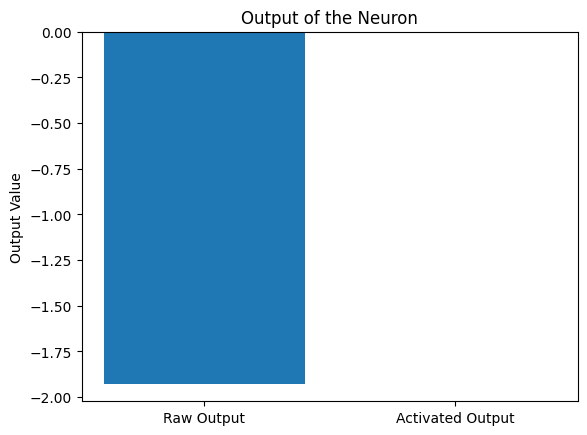

In [100]:
#Forward pass through the neuron
output = neuron(inputs)
# Perform a forward pass and apply the activation function
output = neuron(inputs)
activated_output = activation_function(output)

# Print outputs
print("Raw Output:", output.item())
print("Activated Output:", activated_output.item())

# Plotting the outputs
plt.bar(['Raw Output', 'Activated Output'], [output.item(), activated_output.item()])
plt.title('Output of the Neuron')
plt.ylabel('Output Value')
plt.show()

## Updated Code to Compare Different Activation Functions:

We'll extend the code to apply different activation functions (ReLU, Sigmoid, Tanh) to the same output and plot the results for comparison.

Initial Weights: tensor([ 0.5132, -0.3936, -2.0290])
Initial Bias: tensor([-1.5151])
Raw Output: -7.8759541511535645
ReLU Activated Output: 0.0
Sigmoid Activated Output: 0.000379622244508937
Tanh Activated Output: -0.9999997019767761


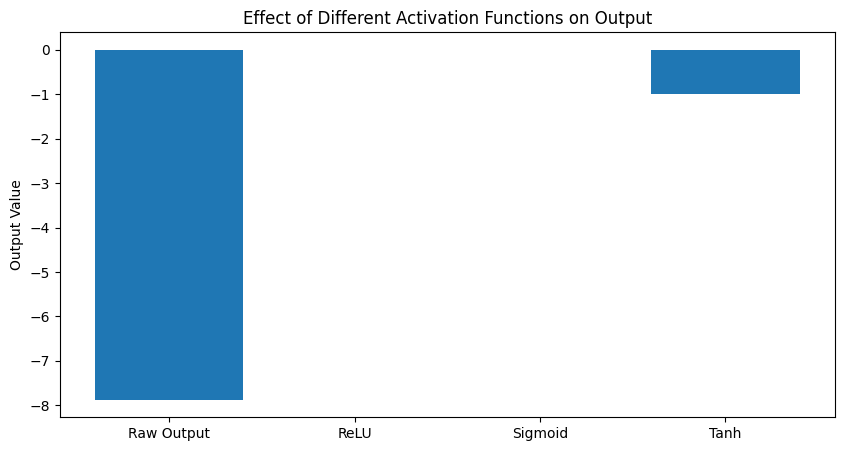

In [101]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the Neuron class
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        self.weights = nn.Parameter(torch.randn(3))  # Random initial weights
        self.bias = nn.Parameter(torch.randn(1))     # Random initial bias

    def forward(self, x):
        # Compute the weighted sum plus bias
        return torch.sum(x * self.weights) + self.bias

# Instantiate the neuron
neuron = SimpleNeuron()

# Define input values (x1, x2, x3)
inputs = torch.tensor([1.0, 2.0, 3.0])

# Print initial weights and bias
print("Initial Weights:", neuron.weights.data)
print("Initial Bias:", neuron.bias.data)

# Perform a forward pass to get the raw output
raw_output = neuron(inputs)
print("Raw Output:", raw_output.item())

# Define different activation functions
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

# Apply each activation function and store the results
activated_outputs = {}
for name, activation in activation_functions.items():
    activated_outputs[name] = activation(raw_output).item()

# Print activated outputs
for name, output in activated_outputs.items():
    print(f"{name} Activated Output: {output}")

# Plotting the outputs
plt.figure(figsize=(10, 5))
plt.bar(['Raw Output'] + list(activated_outputs.keys()), [raw_output.item()] + list(activated_outputs.values()))
plt.title('Effect of Different Activation Functions on Output')
plt.ylabel('Output Value')
plt.show()

## Perceptrons

We create a simple Python code that simulates a perceptron making a decision about going to Coachella based on three factors. Each factor can be represented as a binary input (1 or 0), and the perceptron will have weights associated with each input and a threshold value for decision-making.

In [102]:
import torch
import torch.nn as nn

# Define the Perceptron class
class SimplePerceptron(nn.Module):
    def __init__(self):
        super(SimplePerceptron, self).__init__()
        # Initialize weights and bias as trainable parameters
        #self.weights = nn.Parameter(torch.tensor([0.2, 0.8, 0.6]))  # You can set custom weights
        self.weights = nn.Parameter(torch.rand(3))
        self.bias = nn.Parameter(torch.tensor(-1.0))  # Set a custom bias 

    def forward(self, x):
        # Compute the weighted sum plus bias
        weighted_sum = torch.sum(x * self.weights) + self.bias
        # Apply a step function for binary decision-making
        return 1 if weighted_sum > 0.5 else 0

# Create an instance of the perceptron
perceptron = SimplePerceptron()

# Define input values (factors)
# Example: 1 for True (positive condition), 0 for False (negative condition)
inputs = torch.tensor([1, 1, 1])  # e.g., [Good weather, Friends going, Have tickets]

# Perform a forward pass to get the decision
decision = perceptron(inputs)

# Print the decision
print("Decision (1 means 'Go', 0 means 'Don't go'):", decision)
print("Weights:", perceptron.weights.data)
print("Bias:", perceptron.bias.data)

Decision (1 means 'Go', 0 means 'Don't go'): 1
Weights: tensor([0.4373, 0.5280, 0.8100])
Bias: tensor(-1.)


## Perceptrons for Logical Functions
Let's implement perceptrons in Python to simulate basic logical operations such as AND, OR, and NAND. We will build simple models that take binary inputs and use appropriate weights and biases to produce the desired output.

The question is, what are the weights and biases for each logical perceptron??

In [90]:
import numpy as np

# Define the step activation function
def step_function(x):
    return 1 if x > 0 else 0

# Define a perceptron class
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def forward(self, x):
        # Calculate the weighted sum plus bias
        weighted_sum = np.dot(self.weights, x) + self.bias
        # Apply the step activation function
        return step_function(weighted_sum)

# Create perceptron instances for AND, OR, and NAND gates
and_perceptron = Perceptron(weights=[1, 1], bias=-1)   # Weights and bias for AND gate
or_perceptron = Perceptron(weights=[1, 1], bias=-0.5)    # Weights and bias for OR gate

# Define input combinations for logical operations (binary inputs)
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Print the results for each gate
print("AND Gate:")
for x1, x2 in inputs:
    output = and_perceptron.forward([x1, x2])
    print(f"Input: ({x1}, {x2}) -> Output: {output}")

print("\nOR Gate:")
for x1, x2 in inputs:
    output = or_perceptron.forward([x1, x2])
    print(f"Input: ({x1}, {x2}) -> Output: {output}")

AND Gate:
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 0
Input: (1, 0) -> Output: 0
Input: (1, 1) -> Output: 1

OR Gate:
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 1
Input: (1, 0) -> Output: 1
Input: (1, 1) -> Output: 1


## The Perceptron Challenge:
Can you outsmart the NAND and NOR gates? 

In [91]:
import numpy as np

def step_function(x):
    return 1 if x > 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def forward(self, x):
        # Calculate the weighted sum plus bias
        weighted_sum = np.dot(self.weights, x) + self.bias
        # Apply the step activation function
        return step_function(weighted_sum)

nand_perceptron = Perceptron(weights=[1, 1], bias=-1)   # Weights and bias for NAND gate

# Define input combinations for logical operations (binary inputs)
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

print("\nNAND Gate:")
for x1, x2 in inputs:
    output = nand_perceptron.forward([x1, x2])
    print(f"Input: ({x1}, {x2}) -> Output: {output}")


NAND Gate:
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 0
Input: (1, 0) -> Output: 0
Input: (1, 1) -> Output: 1


In [7]:
import numpy as np

def step_function(x):
    return 1 if x > 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def forward(self, x):
        # Calculate the weighted sum plus bias
        weighted_sum = np.dot(self.weights, x) + self.bias
        # Apply the step activation function
        return step_function(weighted_sum)

nor_perceptron = Perceptron(weights=[1, 1], bias=-1)   # Weights and bias for NOR gate

# Define input combinations for logical operations (binary inputs)
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

print("\nNor Gate:")
for x1, x2 in inputs:
    output = nor_perceptron.forward([x1, x2])
    print(f"Input: ({x1}, {x2}) -> Output: {output}")


Nor Gate:
Input: (0, 0) -> Output: 0
Input: (0, 1) -> Output: 0
Input: (1, 0) -> Output: 0
Input: (1, 1) -> Output: 1


## Neural Networks
A neural network is a computational model inspired by the human brain. It consists of interconnected layers of nodes (or "neurons") that process and transmit information. Each connection between nodes has an associated weight, and each node has a bias. These weights and biases are adjusted during training to minimize the difference between the predicted output and the actual target.

## Import Required Libraries
Explanation: Import necessary libraries for loading data, building the model, and training.


torch: Core PyTorch library for tensors and neural networks.

nn: Module for building and training neural network models.

optim: Provides optimization algorithms like SGD.

torchvision: Library for datasets and image transformations.

DataLoader: Helps load data in batches for training.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset

## Load and Preprocess the Data
Explanation: Load the MNIST dataset and apply basic transformations to convert the images to tensors and normalize them.

transforms.ToTensor(): Converts images to PyTorch tensors.

transforms.Normalize(): Normalizes the image data to help the model learn better.

DataLoader: Loads data in batches for training and evaluation.

In [5]:
#Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
])

# def create_subset(dataset, num_images):
#     indices = torch.arange(0, num_images)
#     return Subset(dataset, indices)

# # Parameters for the number of images in training and test sets
# num_train_images = 1000  # Change this to set the number of training images
# num_test_images = 500    # Change this to set the number of test images

# Download and load the full training and test sets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# # Create subsets
# trainset = create_subset(trainset_full, num_train_images)
# testset = create_subset(testset_full, num_test_images)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=10000, shuffle=False)

# Print the number of images in the datasets
print(f'Number of images in the training set: {len(train_dataset)}')
print(f'Number of images in the test set: {len(test_dataset)}')

Number of images in the training set: 60000
Number of images in the test set: 10000


## If you get error for downloading the MNIST dataset, follow these steps:

1. Download the MNIST_ORG.zip file provided under the Week 11 module.

2. Extract the contents of the zip file and copy the extracted data files (train-images.idx3-ubyte, train-labels.idx1-ubyte, t10k-images.idx3-ubyte, t10k-labels.idx1-ubyte) into the same directory as your Jupyter notebook.

3. Use the following code snippet to verify the directory of your notebook:
import os
print("Notebook directory:", os.getcwd())

4. After confirming the files are in the correct directory, run the code that loads the MNIST dataset directly from these files instead of downloading it.

In [3]:
import os
print("Notebook directory:", os.getcwd())

Notebook directory: C:\Users\atiab


In [4]:
import numpy as np
import struct
import os
from torch.utils.data import Dataset, DataLoader
import torch

# Helper function to load images from IDX file
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
        return images

# Helper function to load labels from IDX file
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels
        
# Set paths to your files and notebook directory, for example since my notebook directory is C:\Users\atiab, I copied MNIST files there. 
#train_images_path = 'C:/Users/atiab/train-images.idx3-ubyte'
#train_labels_path = 'C:/Users/atiab/train-labels.idx1-ubyte'
#test_images_path = 'C:/Users/atiab/t10k-images.idx3-ubyte'
#test_labels_path = 'C:/Users/atiab/t10k-labels.idx1-ubyte'
train_images_path = 'your_directory/train-images.idx3-ubyte'
train_labels_path = 'your_directory/train-labels.idx1-ubyte'
test_images_path = 'your_directory/t10k-images.idx3-ubyte'
test_labels_path = 'your_directory/t10k-labels.idx1-ubyte'

# Load data
train_images = load_images(train_images_path)
train_labels = load_labels(train_labels_path)
test_images = load_images(test_images_path)
test_labels = load_labels(test_labels_path)

from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        # Convert the image to a float tensor and normalize it
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) / 255.0  # Add channel dimension and normalize
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Define the transform
transform = transforms.Normalize((0.5,), (0.5,))  # Normalize to mean 0.5 and std 0.5
# Create datasets
train_dataset = MNISTDataset(train_images, train_labels, transform=transform)
test_dataset = MNISTDataset(test_images, test_labels, transform=transform)

# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=10000, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: 'your_directory/train-images.idx3-ubyte'

### What is a Batch?
- A **batch** is a subset of the dataset that is passed through the neural network in one iteration.
- **Batch Size**: The number of images in a batch (e.g., 64). A larger batch size can make training faster by parallelizing computations but requires more memory.
- **Epoch**: One complete pass through the entire training dataset.
- **Mini-Batch Gradient Descent**: Training is often done in mini-batches rather than the entire dataset at once, as it balances computational efficiency and convergence speed.

### Why Use Batches?
- **Memory Efficiency**: Processing a smaller number of images at a time reduces the memory load, making it possible to train on larger datasets.
- **Stochasticity**: Using mini-batches introduces a level of randomness in the gradient descent process, which helps escape local minima in the loss function.

Shape of the batch of images: torch.Size([128, 1, 28, 28])
Shape of the batch of labels: torch.Size([128])


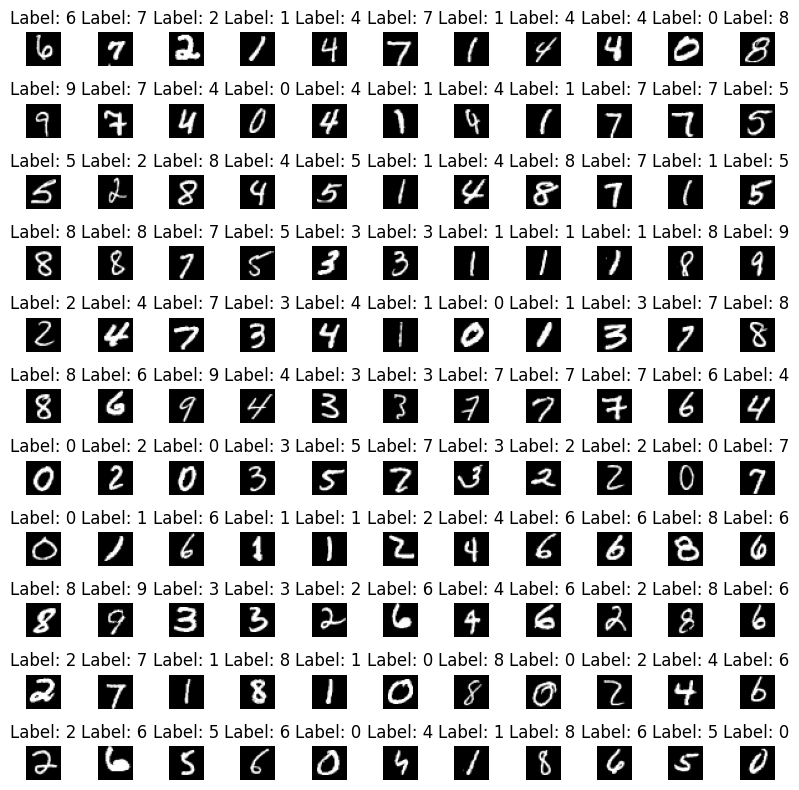

In [6]:
import matplotlib.pyplot as plt

# Function to show a batch of images
def show_batch(images, labels):
    grid_size = int(len(images)**0.5)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i].squeeze(), cmap='gray')
            ax.set_title(f'Label: {labels[i].item()}')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get one batch of images and labels
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display the batch
print(f'Shape of the batch of images: {images.shape}')  # (batch_size, 1, 28, 28)
print(f'Shape of the batch of labels: {labels.shape}')  # (batch_size,)
show_batch(images, labels)

## Define a Simple Neural Network
This cell defines a simple neural network with a single linear layer. The model has one linear layer, mapping 784 input pixels to 10 output classes. The input is flattened to match the input size expected by the linear layer.

In [7]:
#Define the simple neural network without hidden layers
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)  # Input size 784, output size 10 (for digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image from (28, 28) to (784,1)
        
        return self.linear(x)

# Create an instance of the model
model = SimpleNet()

## Define the Loss Function and Optimizer
This cell sets up the loss function and optimizer for training.

CrossEntropyLoss is used for classification tasks with more than two classes. It computes the loss between predicted class probabilities and the true class labels.

SGD (Stochastic Gradient Descent) updates the model's weights to minimize the loss.

In [8]:
#Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.02)

## Train and evaluate the Model
This cell contains the training loop where the model learns from the training data.


`optimizer.zero_grad()` clears old gradients to prevent accumulation.
`loss.backward()` computes gradients for each parameter.
`optimizer.step()` updates the weights and biases.
`torch.no_grad()` saves memory and computation by not calculating gradients during evaluation. 
`torch.max(outputs, 1)` gets the predicted class with the highest score for each input.

Epoch [1/5], Loss: 0.6127, Training Accuracy: 84.12%, Test Accuracy: 88.83%
Epoch [2/5], Loss: 0.3864, Training Accuracy: 89.20%, Test Accuracy: 90.40%
Epoch [3/5], Loss: 0.3522, Training Accuracy: 90.01%, Test Accuracy: 90.94%
Epoch [4/5], Loss: 0.3347, Training Accuracy: 90.48%, Test Accuracy: 91.29%
Epoch [5/5], Loss: 0.3238, Training Accuracy: 90.84%, Test Accuracy: 91.37%


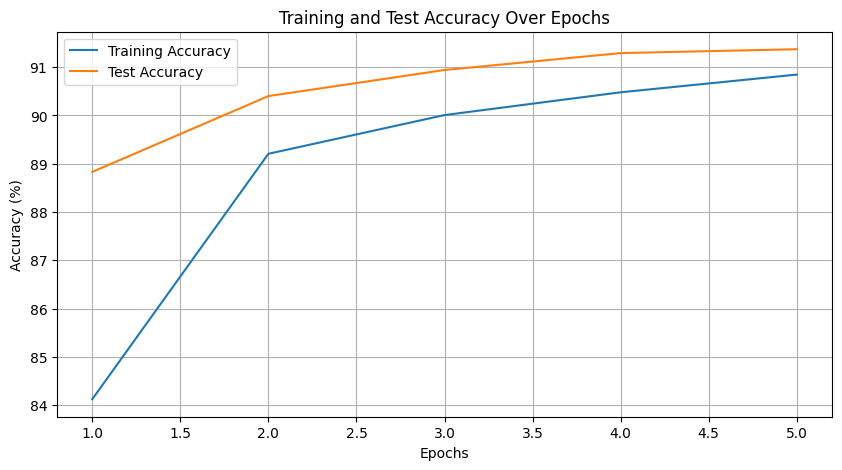

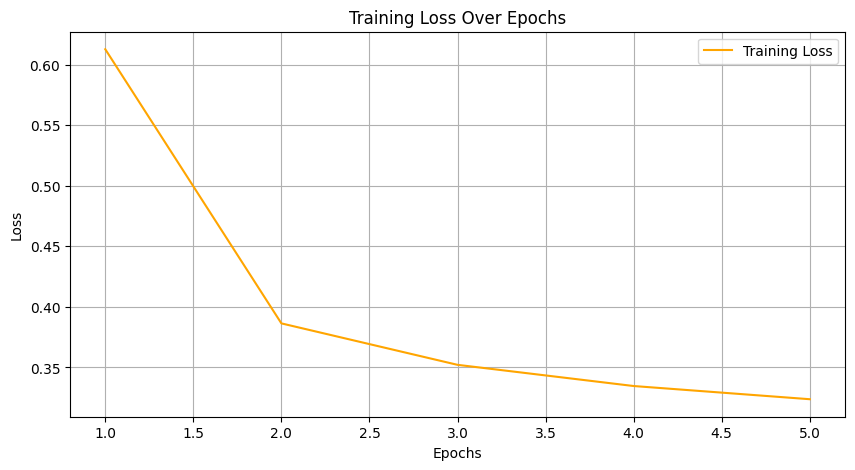

In [9]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

# Train the model and store training/test accuracy and loss
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Now we want to input our own image and see if the neural network can recognize it. You can add a function to preprocess a given image and pass it through the trained model. 

# Steps for Students:
1. Take a photo of a handwritten digit or download one.
2. Rename the file (e.g., digit_image.png) and save it in the notebook's directory.
3. Run the predict_image() function with the file name to see the prediction.

In [11]:
import os
# you can use this commands to find th edirectory of your jupyter notebook
# Print the current working directory
print("Your Jupyter Notebook is running in this directory:")
print(os.getcwd())

Your Jupyter Notebook is running in this directory:
C:\Users\atiab


Using model: SimpleNet


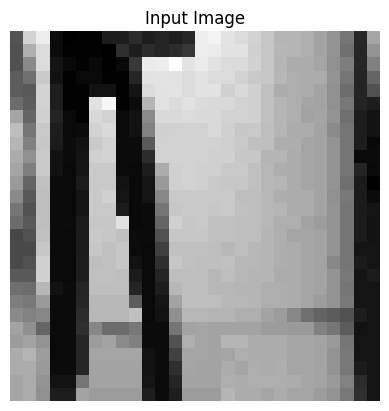

Predicted Label: 3


In [10]:
from PIL import Image
import numpy as np

# Function to preprocess and predict a given image
def predict_image(image_path, model):
    model.eval()  # Set the model to evaluation mode
    print(f"Using model: {model.__class__.__name__}")

    # Load and preprocess the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28 pixels
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = (image_array - 0.5) / 0.5  # Normalize to [-1, 1] to match training

    # Check for potential problems like inverted colors
    if image_array.mean() > 0.5:  # If the background is dark and digits are light
        image_array = 1 - image_array  # Invert colors to match MNIST format

    image_tensor = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

    # Display the image
    plt.imshow(image_array, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    # Run the image through the model and get the prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)

    # Print the predicted label
    print(f'Predicted Label: {predicted_label.item()}')

# Test the function with an uploaded image
image_path = 'camera_2.png'  # Replace with the path to your image
predict_image(image_path, model)

## Neural Network with one hidden layer 

A hidden layer in a neural network is a layer of neurons located between the input and output layers. It allows the network to learn and represent more complex patterns and relationships in the data by introducing non-linear transformations.

Number of images in the training set: 60000
Number of images in the test set: 10000
Epoch [1/10], Loss: 0.5644, Training Accuracy: 85.09%, Test Accuracy: 90.98%
Epoch [2/10], Loss: 0.3139, Training Accuracy: 90.88%, Test Accuracy: 92.19%
Epoch [3/10], Loss: 0.2672, Training Accuracy: 92.23%, Test Accuracy: 93.03%
Epoch [4/10], Loss: 0.2307, Training Accuracy: 93.36%, Test Accuracy: 93.74%
Epoch [5/10], Loss: 0.2025, Training Accuracy: 94.27%, Test Accuracy: 94.70%
Epoch [6/10], Loss: 0.1789, Training Accuracy: 94.93%, Test Accuracy: 95.10%
Epoch [7/10], Loss: 0.1603, Training Accuracy: 95.47%, Test Accuracy: 95.63%
Epoch [8/10], Loss: 0.1453, Training Accuracy: 95.88%, Test Accuracy: 95.94%
Epoch [9/10], Loss: 0.1330, Training Accuracy: 96.22%, Test Accuracy: 96.19%
Epoch [10/10], Loss: 0.1221, Training Accuracy: 96.50%, Test Accuracy: 96.42%


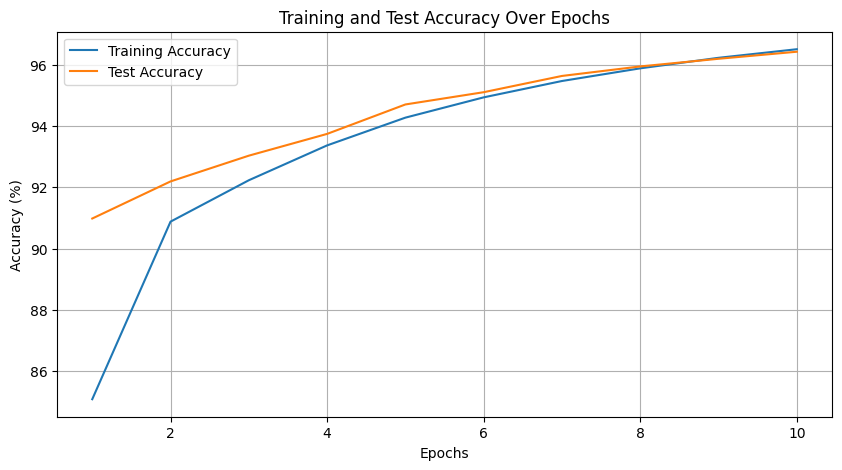

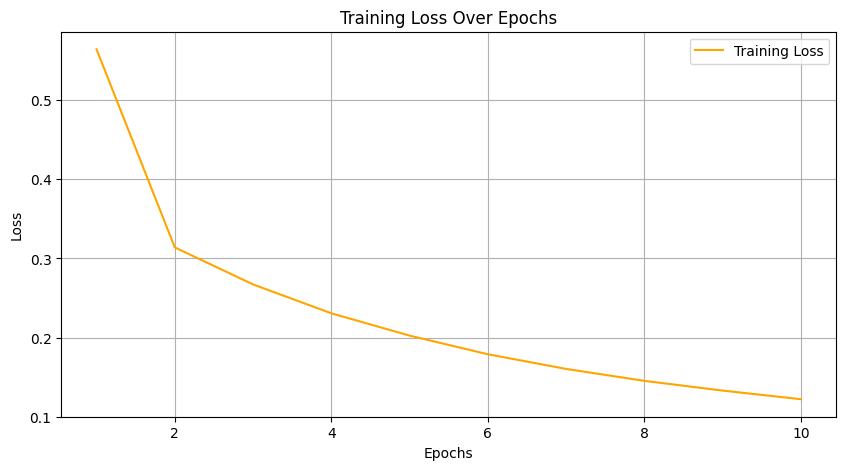

In [17]:
# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=10000, shuffle=False)
# Print the number of images in the training and test sets
print(f'Number of images in the training set: {len(train_dataset)}')
print(f'Number of images in the test set: {len(test_dataset)}')

# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

#Define the neural network with a hidden layer
class SimpleNetWithHiddenLayer(nn.Module):
    def __init__(self):
        super(SimpleNetWithHiddenLayer, self).__init__()
        self.hidden = nn.Linear(28 * 28, 128)  # Input size 784, hidden layer size 128
        self.relu = nn.ReLU()                 # ReLU activation function
        self.output = nn.Linear(128, 10)      # Output layer for 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image from (28, 28) to (784,)
        x = self.relu(self.hidden(x))  # Apply hidden layer and ReLU activation
        x = self.output(x)             # Apply output layer
        return x

# Create an instance of the model
model = SimpleNetWithHiddenLayer()


#Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.02)

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## How can we increase the accuracy?

Try to modify different parameters of the code and let us know if you could achieve a higher accuract.

## Convolutional Neural Network

We can build a simple Convolutional Neural Network (CNN) for the MNIST dataset. This basic example will help students understand the structure and functionality of CNNs for image classification.

The model consists of two convolutional layers, followed by max pooling and ReLU activation.
The output is flattened and passed through two fully connected layers to produce the final class predictions.

CrossEntropyLoss computes the loss between predicted class probabilities and the true class labels.
Adam optimizer is used for its adaptive learning rate, often providing faster convergence.


Epoch [1/10], Loss: 0.3663, Training Accuracy: 87.94%, Test Accuracy: 96.84%
Epoch [2/10], Loss: 0.1081, Training Accuracy: 96.73%, Test Accuracy: 97.28%
Epoch [3/10], Loss: 0.1019, Training Accuracy: 96.98%, Test Accuracy: 97.48%
Epoch [4/10], Loss: 0.0971, Training Accuracy: 97.20%, Test Accuracy: 96.10%
Epoch [5/10], Loss: 0.0944, Training Accuracy: 97.27%, Test Accuracy: 97.64%
Epoch [6/10], Loss: 0.0895, Training Accuracy: 97.34%, Test Accuracy: 97.29%
Epoch [7/10], Loss: 0.0878, Training Accuracy: 97.43%, Test Accuracy: 97.24%
Epoch [8/10], Loss: 0.0911, Training Accuracy: 97.40%, Test Accuracy: 97.29%
Epoch [9/10], Loss: 0.0852, Training Accuracy: 97.58%, Test Accuracy: 97.60%
Epoch [10/10], Loss: 0.0850, Training Accuracy: 97.59%, Test Accuracy: 97.00%


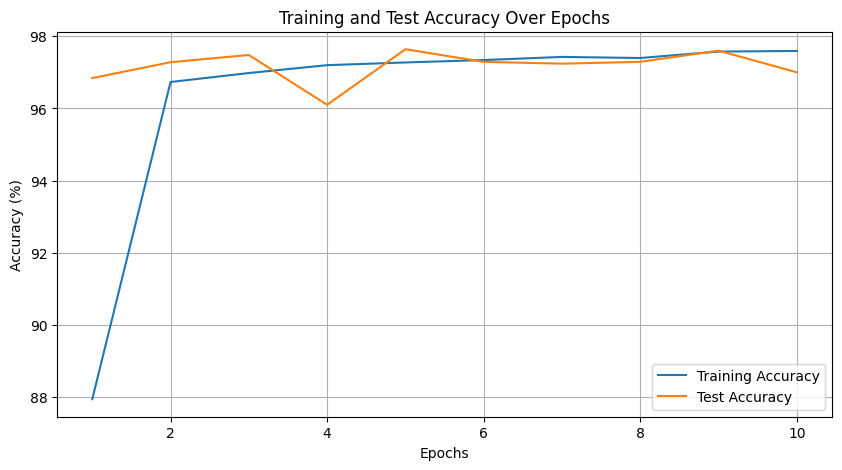

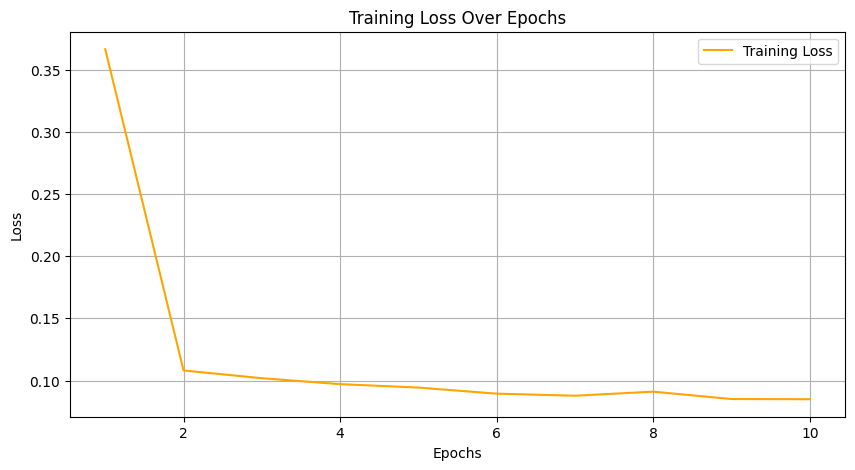

In [18]:
# Create DataLoaders
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=10000, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()  # ReLU activation function
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Max pooling layer
        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes for digits 0-9)

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Apply first convolution + ReLU
        x = self.pool(x)  # Apply max pooling
        x = self.relu(self.conv2(x))  # Apply second convolution + ReLU
        x = self.pool(x)  # Apply max pooling again
        x = x.view(-1, 32 * 7 * 7)  # Flatten the output for the fully connected layer
        x = self.relu(self.fc1(x))  # Apply first fully connected layer + ReLU
        x = self.fc2(x)  # Apply output layer
        return x

# Create an instance of the model
model = SimpleCNN()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Used for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.02)  # Adam optimizer for adaptive learning
epochs = 5
# Lists to store accuracy and loss values for plotting
train_accuracies = []
test_accuracies = []
train_losses = []

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear previous gradients

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy for the epoch
    avg_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total

    # Store the loss and accuracy
    train_losses.append(avg_loss)
    train_accuracies.append(train_accuracy)

    # Calculate test accuracy
    model.eval()  # Set the model to evaluation mode
    test_correct = 0
    test_total = 0
    with torch.no_grad():  # No gradient computation during testing
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Print training loss, training accuracy, and test accuracy for the epoch
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

# Plot the training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Using model: SimpleCNN


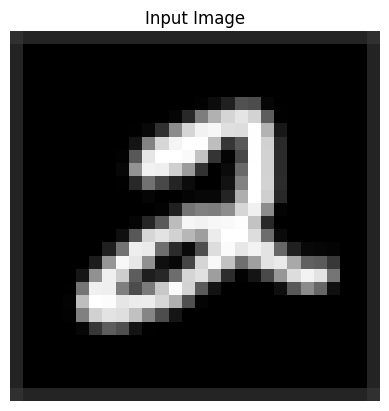

Predicted Label: 2


In [25]:
from PIL import Image
import numpy as np

# Function to preprocess and predict a given image
def predict_image(image_path, model):
    model.eval()  # Set the model to evaluation mode
    print(f"Using model: {model.__class__.__name__}")

    # Load and preprocess the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28 pixels
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = (image_array - 0.5) / 0.5  # Normalize to [-1, 1] to match training

    # Check for potential problems like inverted colors
    if image_array.mean() > 0.5:  # If the background is dark and digits are light
        image_array = 1 - image_array  # Invert colors to match MNIST format

    image_tensor = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

    # Display the image
    plt.imshow(image_array, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    # Run the image through the model and get the prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)

    # Print the predicted label
    print(f'Predicted Label: {predicted_label.item()}')

# Test the function with an uploaded image
image_path = 'digit_image.png'  # Replace with the path to your image
predict_image(image_path, model)

## The effect of different parameters on the accuracy 

The function `train_and_evaluate_model` trains and evaluates a model with the specified hidden layer size, learning rate, and number of epochs.

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Function to create a simple NN with variable hidden layer size
class CustomNet(nn.Module):
    def __init__(self, hidden_units=128, activation=nn.ReLU()):
        super(CustomNet, self).__init__()
        self.hidden = nn.Linear(28 * 28, hidden_units)
        self.activation = activation
        self.output = nn.Linear(hidden_units, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=5):
    model = CustomNet(hidden_units)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    test_accuracies = []
    train_losses = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(train_accuracy)

        # Evaluation loop
        model.eval()
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

        test_accuracy = 100 * test_correct / test_total
        test_accuracies.append(test_accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, '
              f'Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies, train_losses

In [70]:
# Experiment 1: Default parameters
train_acc1, test_acc1, loss1 = train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=5)

# Experiment 2: Change learning rate
train_acc2, test_acc2, loss2 = train_and_evaluate_model(hidden_units=128, learning_rate=0.01, epochs=5)

# Experiment 3: Increase number of hidden units
train_acc3, test_acc3, loss3 = train_and_evaluate_model(hidden_units=256, learning_rate=0.001, epochs=5)

# Experiment 4: Increase number of epochs
train_acc4, test_acc4, loss4 = train_and_evaluate_model(hidden_units=128, learning_rate=0.001, epochs=10)

# Explanation:
# - Experiment with different values for hidden units, learning rates, and number of epochs.
# - Each call will print the training and test accuracy for each epoch.

Epoch [1/5], Loss: 0.4308, Training Accuracy: 87.63%, Test Accuracy: 92.34%
Epoch [2/5], Loss: 0.2378, Training Accuracy: 92.99%, Test Accuracy: 94.04%
Epoch [3/5], Loss: 0.1737, Training Accuracy: 95.00%, Test Accuracy: 94.79%
Epoch [4/5], Loss: 0.1364, Training Accuracy: 96.01%, Test Accuracy: 95.96%
Epoch [5/5], Loss: 0.1138, Training Accuracy: 96.63%, Test Accuracy: 96.68%
Epoch [1/5], Loss: 0.4114, Training Accuracy: 87.91%, Test Accuracy: 93.52%
Epoch [2/5], Loss: 0.2127, Training Accuracy: 93.55%, Test Accuracy: 92.70%
Epoch [3/5], Loss: 0.1959, Training Accuracy: 94.15%, Test Accuracy: 94.88%
Epoch [4/5], Loss: 0.1872, Training Accuracy: 94.40%, Test Accuracy: 94.86%
Epoch [5/5], Loss: 0.1867, Training Accuracy: 94.50%, Test Accuracy: 93.80%
Epoch [1/5], Loss: 0.3967, Training Accuracy: 88.44%, Test Accuracy: 92.95%
Epoch [2/5], Loss: 0.1958, Training Accuracy: 94.30%, Test Accuracy: 94.90%
Epoch [3/5], Loss: 0.1380, Training Accuracy: 95.97%, Test Accuracy: 95.71%
Epoch [4/5],

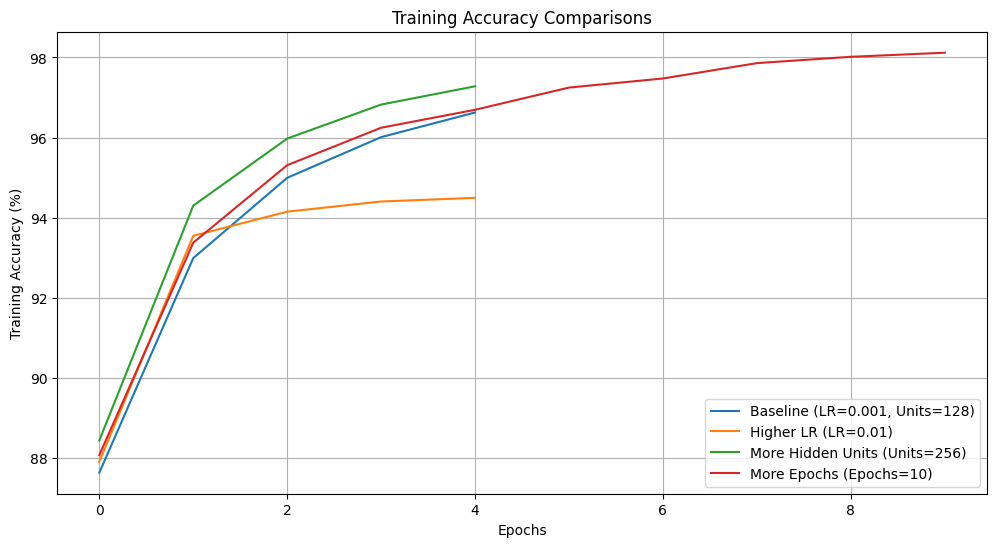

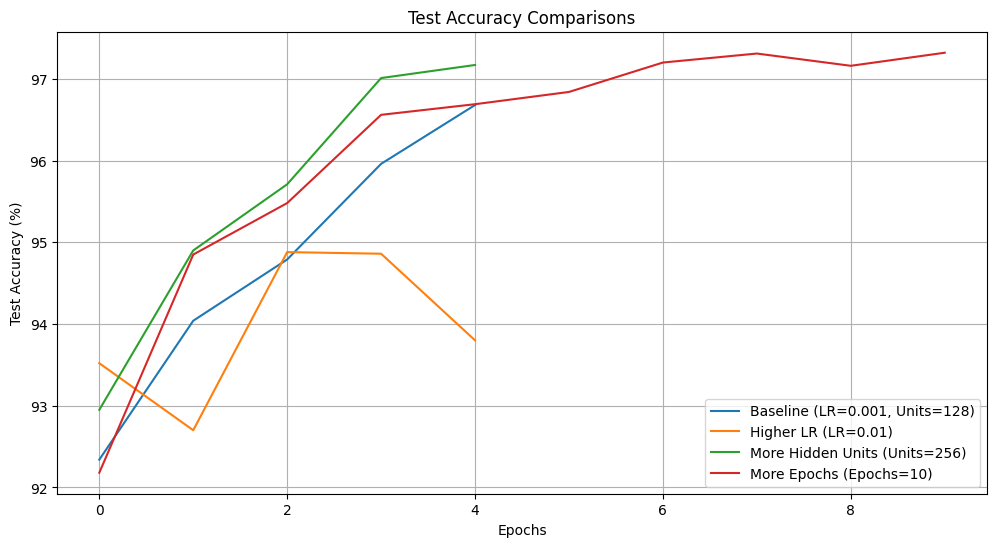

In [71]:
# Plot training accuracy comparisons
plt.figure(figsize=(12, 6))
plt.plot(train_acc1, label='Baseline (LR=0.001, Units=128)')
plt.plot(train_acc2, label='Higher LR (LR=0.01)')
plt.plot(train_acc3, label='More Hidden Units (Units=256)')
plt.plot(train_acc4, label='More Epochs (Epochs=10)')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy Comparisons')
plt.legend()
plt.grid(True)
plt.show()

# Plot test accuracy comparisons
plt.figure(figsize=(12, 6))
plt.plot(test_acc1, label='Baseline (LR=0.001, Units=128)')
plt.plot(test_acc2, label='Higher LR (LR=0.01)')
plt.plot(test_acc3, label='More Hidden Units (Units=256)')
plt.plot(test_acc4, label='More Epochs (Epochs=10)')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparisons')
plt.legend()
plt.grid(True)
plt.show()

## Underfitting and Overfitting
Underfitting: Occurs when a model is too simple to capture the underlying patterns in the training data. Both training and test accuracy will be low.

Overfitting: Occurs when a model learns the training data too well, including noise and specific details, leading to high training accuracy but poor test accuracy.



Underfitting Model:
Epoch [1/5], Training Accuracy: 86.80%, Test Accuracy: 90.64%
Epoch [2/5], Training Accuracy: 90.48%, Test Accuracy: 91.23%
Epoch [3/5], Training Accuracy: 91.04%, Test Accuracy: 91.25%
Epoch [4/5], Training Accuracy: 91.42%, Test Accuracy: 90.93%
Epoch [5/5], Training Accuracy: 91.66%, Test Accuracy: 90.71%

Overfitting Model:
Epoch [1/50], Training Accuracy: 91.14%, Test Accuracy: 95.50%
Epoch [2/50], Training Accuracy: 95.89%, Test Accuracy: 95.42%
Epoch [3/50], Training Accuracy: 96.75%, Test Accuracy: 96.93%
Epoch [4/50], Training Accuracy: 97.48%, Test Accuracy: 97.05%
Epoch [5/50], Training Accuracy: 97.75%, Test Accuracy: 96.98%
Epoch [6/50], Training Accuracy: 98.05%, Test Accuracy: 97.59%
Epoch [7/50], Training Accuracy: 98.27%, Test Accuracy: 97.87%
Epoch [8/50], Training Accuracy: 98.41%, Test Accuracy: 97.47%
Epoch [9/50], Training Accuracy: 98.57%, Test Accuracy: 97.48%
Epoch [10/50], Training Accuracy: 98.76%, Test Accuracy: 97.62%
Epoch [11/50], Tra

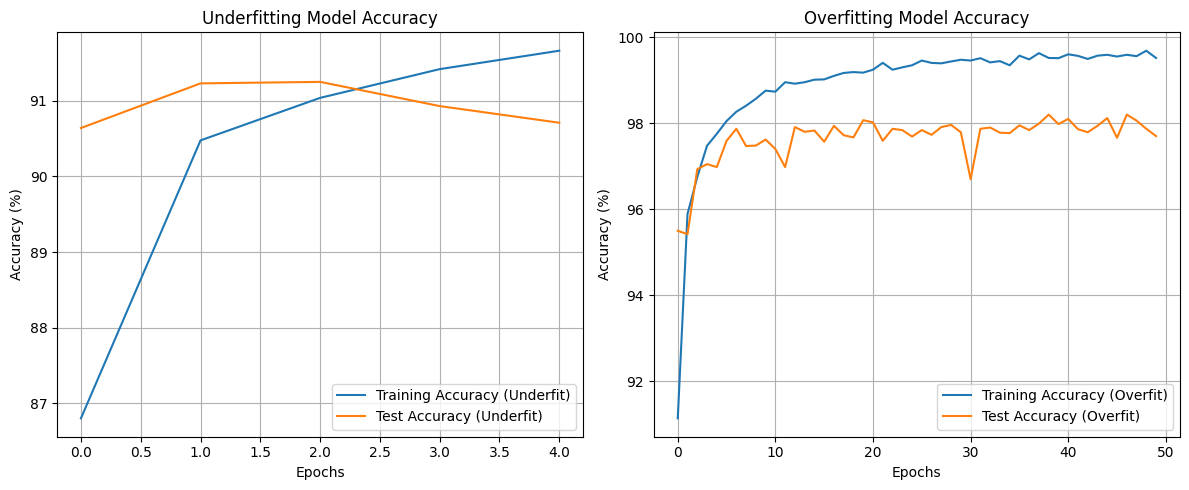

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Simple network for underfitting (no hidden layers)
class SimpleNetUnderfit(nn.Module):
    def __init__(self):
        super(SimpleNetUnderfit, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        return self.linear(x)

# Complex network for overfitting (with hidden layers)
class SimpleNetOverfit(nn.Module):
    def __init__(self):
        super(SimpleNetOverfit, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# Function to train the model and collect accuracy data
def train_model(model, epochs=20, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0.0

        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_accuracies.append(train_accuracy)

        # Evaluate test accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies

# Train and evaluate the underfitting model
print("\nUnderfitting Model:")
model_underfit = SimpleNetUnderfit()
train_acc_underfit, test_acc_underfit = train_model(model_underfit, epochs=5)  # Fewer epochs for underfitting

# Train and evaluate the overfitting model
print("\nOverfitting Model:")
model_overfit = SimpleNetOverfit()
train_acc_overfit, test_acc_overfit = train_model(model_overfit, epochs=50)  # More epochs for overfitting

# Plot training and test accuracy curves
plt.figure(figsize=(12, 5))

# Plot for underfitting model
plt.subplot(1, 2, 1)
plt.plot(train_acc_underfit, label='Training Accuracy (Underfit)')
plt.plot(test_acc_underfit, label='Test Accuracy (Underfit)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Underfitting Model Accuracy')
plt.legend()
plt.grid(True)

# Plot for overfitting model
plt.subplot(1, 2, 2)
plt.plot(train_acc_overfit, label='Training Accuracy (Overfit)')
plt.plot(test_acc_overfit, label='Test Accuracy (Overfit)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Overfitting Model Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()